# Linear Regression
# Ridge Regression
# Lasso regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
## load the data 
car_data = pd.read_csv('car data low.csv')

In [3]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(car_data.Fuel_Type .value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [7]:
print(car_data.Seller_Type .value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [8]:
print(car_data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
#visualizing  the some  features in dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F:\vineethreddy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

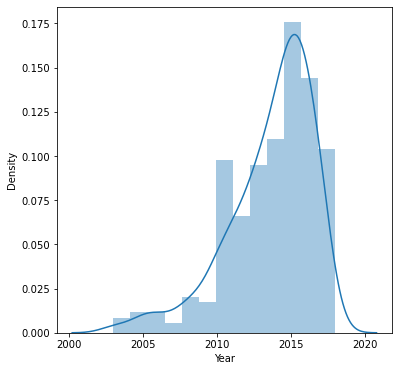

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(car_data['Year'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F:\vineethreddy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

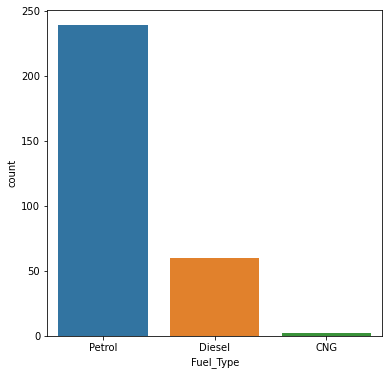

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(car_data['Fuel_Type'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F:\vineethreddy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

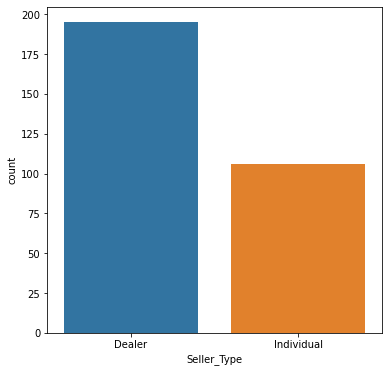

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(car_data['Seller_Type'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F:\vineethreddy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

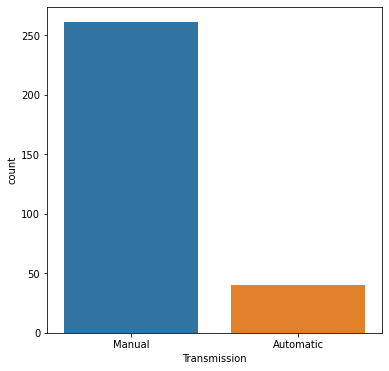

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(car_data['Transmission'])

In [14]:
## encoding the feturecolomns to chaange categorical to numerical

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car_data['Fuel_Type'] = le.fit_transform(car_data['Fuel_Type'])

In [16]:
le = LabelEncoder()
car_data['Seller_Type'] = le.fit_transform(car_data['Seller_Type'])

In [17]:
le = LabelEncoder()
car_data['Transmission'] = le.fit_transform(car_data['Transmission'])

In [18]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [19]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [20]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 17.8+ KB


In [21]:
corr=car_data.corr()

In [22]:
corr

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


In [23]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [24]:
X = car_data.drop(['Car_Name','Selling_Price'],axis =1)

In [25]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [26]:
Y = car_data['Selling_Price']

In [27]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler,minmax_scale
std=StandardScaler()
X_=std.fit_transform(X)

In [29]:
corr = car_data.corr()
corr

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

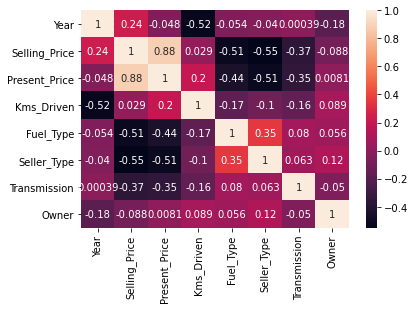

In [30]:
sns.heatmap(corr,annot=True)

In [31]:
##train_test _split the data for model training

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2,test_size=0.1)

In [33]:
len(X_train)

270

In [34]:
len(X_test)

31

In [35]:
## import the sciket learn libraries 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error


In [36]:
# model training
model_lr=LinearRegression()

In [37]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [38]:
pred_test_lr = model_lr.predict(X_train)

In [39]:
print(pred_test_lr)

[ 3.73088505e+00  5.60702081e+00  7.79779356e+00 -1.88374756e+00
  6.71614572e+00  8.14343296e+00  5.84067525e+00  6.17919527e+00
  6.15863751e+00  1.59459051e+01  2.15385926e+00  1.11618544e+00
 -4.05463414e-01  6.69051516e+00  6.81961414e+00  1.02957394e+00
  6.74306974e+00  1.43864300e+01  3.00001893e+00  7.95149024e+00
 -8.38569413e-01  9.02067892e+00  1.21210550e+00  2.20040027e+00
 -8.23744275e-01  7.52651502e-01  1.00142469e+01 -4.08950275e-01
 -2.40418357e+00  9.99845989e+00  6.81867179e+00  1.09249928e+00
  4.36158792e+00  9.20660480e-02  3.48993776e+00  2.78147834e+00
  1.50401026e+00  4.65736158e-01  1.68679810e+00  1.18722506e+00
  4.32936153e+00  6.09932798e+00  9.51639926e-01  7.52875828e-01
  6.05967594e+00  3.49453005e+00  2.40969246e+00  7.52230513e+00
  4.63113915e+00  4.44239322e+00  4.22460259e+00  2.71077171e+00
  4.46881874e+00  1.76156730e+00  2.86100050e-01  3.95181249e+00
  1.36371845e+00  4.63046605e+00  1.44343122e+00  7.27550233e+00
  7.26488044e+00  6.54659

In [40]:
# model evaluation

test_lr_r2 = metrics.r2_score(Y_train,pred_test_lr)

<IPython.core.display.Javascript object>

In [41]:
print('R square value:',test_lr_r2)

R square value: 0.8799451660493711


In [42]:
mse=metrics.mean_squared_error(Y_train,pred_test_lr)

<IPython.core.display.Javascript object>

In [43]:
print('mean squared error:',mse)

mean squared error: 3.259030823309084


In [44]:
model_lr.coef_

array([ 4.09426126e-01,  4.38728846e-01, -6.73100388e-06, -1.76308349e+00,
       -1.00417660e+00, -1.50736348e+00, -8.74133473e-01])

In [45]:
model_lr.intercept_


-817.9824317472435

In [46]:
## actual vs predict values 
pred_y_train_df=pd.DataFrame({'actual value':Y_train,'predicted value':pred_test_lr,'differense':Y_train-pred_test_lr})
pred_y_train_df

,actual value,predicted value,differense
204,2.75,3.730885,-0.980885
249,5.25,5.607021,-0.357021
277,9.70,7.797794,1.902206
194,0.20,-1.883748,2.083748
244,5.95,6.716146,-0.766146
...,...,...,...
75,3.95,4.718723,-0.768723
22,4.40,5.025009,-0.625009
72,7.45,8.946631,-1.496631
15,7.75,8.594643,-0.844643


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

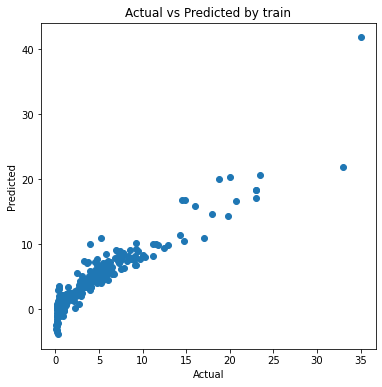

In [47]:
## 
plt.figure(figsize=(6,6))
plt.scatter(Y_train,pred_test_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted by train')
plt.show()

In [48]:
R=Ridge(alpha=1.0) 

In [49]:
R.fit(X_train, Y_train)

Ridge()

In [50]:
#prediction on train data using ridge
y_pred_ridge= R.predict(X_train)
y_pred_ridge

array([ 3.73533464e+00,  5.61925870e+00,  7.82179708e+00, -1.88345616e+00,
        6.68181924e+00,  8.11177836e+00,  5.85364234e+00,  6.19607155e+00,
        6.12546219e+00,  1.59279197e+01,  2.16936353e+00,  1.12770098e+00,
       -4.00299715e-01,  6.66339411e+00,  6.83811634e+00,  1.04563057e+00,
        6.70807077e+00,  1.43711195e+01,  3.00400526e+00,  7.92480161e+00,
       -8.36682765e-01,  9.05477164e+00,  1.22492397e+00,  2.21579886e+00,
       -8.11607249e-01,  7.61794235e-01,  9.98828912e+00, -4.05020468e-01,
       -2.40640141e+00,  9.98329784e+00,  6.83719753e+00,  1.15412433e+00,
        4.36486786e+00,  9.67841007e-02,  3.43806534e+00,  2.78405411e+00,
        1.51812414e+00,  4.76668890e-01,  1.70026972e+00,  1.20092917e+00,
        4.33739625e+00,  6.05707927e+00,  9.71228312e-01,  7.73466245e-01,
        6.02109927e+00,  3.44534295e+00,  2.42673262e+00,  7.47214378e+00,
        4.64043412e+00,  4.45113171e+00,  4.20394902e+00,  2.71488900e+00,
        4.47425522e+00,  

In [51]:
#r2 score on train data
r2_score_ridge = metrics.r2_score(Y_train,y_pred_ridge)
r2_score_ridge

<IPython.core.display.Javascript object>

0.8799138947708268

In [52]:
pred_y_train_rg=pd.DataFrame({'actual value':Y_train,'predicted value':y_pred_ridge,'differense':Y_train-y_pred_ridge})
pred_y_train_rg

,actual value,predicted value,differense
204,2.75,3.735335,-0.985335
249,5.25,5.619259,-0.369259
277,9.70,7.821797,1.878203
194,0.20,-1.883456,2.083456
244,5.95,6.681819,-0.731819
...,...,...,...
75,3.95,4.729806,-0.779806
22,4.40,4.966881,-0.566881
72,7.45,8.982573,-1.532573
15,7.75,8.570080,-0.820080


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

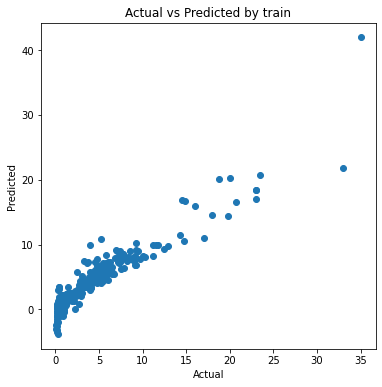

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(Y_train,y_pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted by train')
plt.show()

In [54]:
model_lasso = Lasso()

In [55]:
model_lasso.fit(X_train,Y_train)

Lasso()

In [56]:
pred_train_lasso = model_lasso.predict(X_train)

In [57]:
r2_score_lasso = metrics.r2_score(Y_train,pred_train_lasso)

<IPython.core.display.Javascript object>

In [58]:
print('r2_score is',r2_score_lasso)

r2_score is 0.8427856123435794


In [59]:
mse=metrics.mean_squared_error(Y_train,pred_train_lasso)

<IPython.core.display.Javascript object>

In [60]:
print('mean square error',mse)

mean square error 4.267770970810244


In [61]:
pred_y_train_ls=pd.DataFrame({'actual value':Y_train,'predicted value':pred_train_lasso,'differense':Y_train-pred_train_lasso})
pred_y_train_ls

,actual value,predicted value,differense
204,2.75,3.566791,-0.816791
249,5.25,5.602576,-0.352576
277,9.70,8.287814,1.412186
194,0.20,-0.830814,1.030814
244,5.95,5.275399,0.674601
...,...,...,...
75,3.95,4.722108,-0.772108
22,4.40,3.876807,0.523193
72,7.45,9.923665,-2.473665
15,7.75,7.049922,0.700078


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

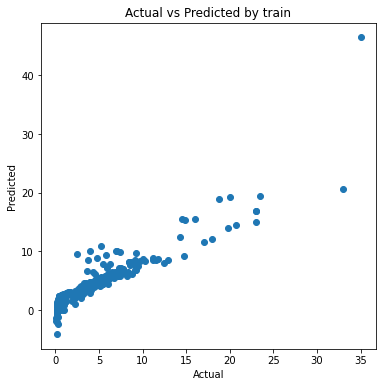

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(Y_train,pred_train_lasso)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted by train')
plt.show()